## Import Library

In [2]:
import numpy as np
import pandas as pd
import src.utils as utils

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Configuration File

In [3]:
config_data = utils.config_load()
config_data

{'raw_dataset_path': 'data/raw/data.csv',
 'data_set_path': 'data/output/data.pkl',
 'input_set_path': 'data/output/input.pkl',
 'output_set_path': 'data/output/output.pkl',
 'input_columns_path': 'data/output/input_columns.pkl',
 'train_set_path': ['data/output/X_train.pkl', 'data/output/y_train.pkl'],
 'valid_set_path': ['data/output/X_valid.pkl', 'data/output/y_valid.pkl'],
 'test_set_path': ['data/output/X_test.pkl', 'data/output/y_test.pkl'],
 'index_column': 'Unnamed: 0',
 'output_column': 'SeriousDlqin2yrs',
 'seed': 42,
 'test_size': 0.2,
 'clean_late_col': 'NumberOfTimes90DaysLate',
 'clean_late_val': 96,
 'clean_unsecure_col': 'RevolvingUtilizationOfUnsecuredLines',
 'constant_imputer_col': 'NumberOfDependents',
 'constant_imputer_path': 'data/output/constant_imputer.pkl',
 'constant_imputer_val': 0.0,
 'median_imputer_col': 'MonthlyIncome',
 'median_imputer_path': 'data/output/median_imputer.pkl',
 'standardizer_path': 'data/output/standardizer.pkl',
 'preprocessor_path': 'd

## Load Data

In [4]:
X_train = utils.pickle_load(config_data['train_set_path'][0])
y_train = utils.pickle_load(config_data['train_set_path'][1])

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (96000, 10)
y_train shape: (96000,)


In [5]:
data = pd.concat((X_train, y_train), axis=1)
data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
145776,0.085396,60,0,6.053892,500.0,10,0,2,0,0.0,0
61313,0.007089,48,0,0.284185,9623.0,16,0,2,0,0.0,0
128371,0.047499,62,0,6265.000000,NaN,19,0,4,0,0.0,0
48243,0.050541,33,0,4821.000000,NaN,9,0,3,0,0.0,0
54026,0.153372,50,0,0.375656,4000.0,9,0,1,0,0.0,0


## Exploratory Data Analysis (EDA)

##### 1. Check Data Type

In [6]:
# Check datatype
data.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
SeriousDlqin2yrs                          int64
dtype: object

##### 2. Check Missing Value

In [7]:
# Check missing value
data.isna().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           18946
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2496
SeriousDlqin2yrs                            0
dtype: int64

In [8]:
data[data['NumberOfDependents'].isna()]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
59728,0.014758,69,0,21.0,NaN,5,0,0,0,NaN,0
135372,0.000000,79,0,0.0,NaN,4,0,0,0,NaN,0
61575,0.032305,46,0,1510.0,NaN,6,0,2,0,NaN,0
124858,1.000000,24,0,66.0,NaN,0,0,0,0,NaN,0
17288,0.243781,51,2,661.0,NaN,2,0,1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
142722,1.000000,23,0,4.0,NaN,1,0,0,0,NaN,0
75792,0.912596,49,0,744.0,NaN,7,0,1,0,NaN,0
14089,0.013069,29,0,11.0,NaN,3,0,0,0,NaN,0
84180,0.199312,61,0,3276.0,NaN,3,0,1,0,NaN,0


In [9]:
data[data['MonthlyIncome'].isna()]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
128371,0.047499,62,0,6265.0,NaN,19,0,4,0,0.0,0
48243,0.050541,33,0,4821.0,NaN,9,0,3,0,0.0,0
36943,0.044536,46,0,4207.0,NaN,12,0,4,0,0.0,0
59728,0.014758,69,0,21.0,NaN,5,0,0,0,NaN,0
6378,0.290095,59,0,4032.0,NaN,6,0,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
146316,0.017290,46,0,3203.0,NaN,6,0,1,0,0.0,0
55818,0.067284,64,0,1044.0,NaN,3,0,1,0,NaN,0
129006,0.009658,83,0,21.0,NaN,14,0,0,0,0.0,0
87940,0.208658,52,0,1933.0,NaN,8,0,1,0,0.0,0


_There are two columns that have missing values, namely the <span style="background-color: #767676;">MonthlyIncome</span> and <span style="background-color: #767676;">NumberOfDependents</span> columns_

---

##### 3. Data Visualization

In [10]:
data.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

Text(0.5, 1.0, 'NumberOfTimes90DaysLate')

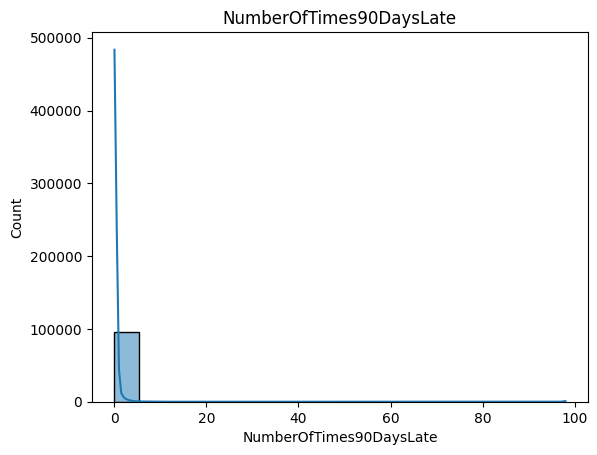

In [11]:
col = 'NumberOfTimes90DaysLate'

sns.histplot(data[col], kde=True)
plt.title(col)

In [12]:
data[data[col]==98]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
42920,1.0,49,98,0.0,3000.0,0,98,0,98,0.0,0
126270,1.0,27,98,45.0,NaN,0,98,0,98,0.0,1
134594,1.0,33,98,0.0,4100.0,0,98,0,98,1.0,1
72671,1.0,23,98,0.0,NaN,0,98,0,98,0.0,1
40716,1.0,21,98,0.0,NaN,0,98,0,98,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
141072,1.0,24,98,0.0,750.0,0,98,0,98,0.0,0
30081,1.0,22,98,0.0,NaN,0,98,0,98,NaN,0
82424,1.0,22,98,0.0,NaN,0,98,0,98,NaN,1
98032,1.0,25,98,54.0,NaN,0,98,0,98,0.0,1


In [13]:
data[data[col]==98]['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

98    160
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [14]:

data[data[col]==98]['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

98    160
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [15]:
data[data[col]==96]['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

96    2
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [16]:
data[data[col]==96]['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

96    2
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

_We have to drop outlier values from <span style="background-color: #767676;">NumberOfTime30-59DaysPastDueNotWorse</span>, <span style="background-color: #767676;">NumberOfTime60-89DaysPastDueNotWorse</span> and <span style="background-color: #767676;">NumberOfTimes90DaysLate</span> columns._
_The data whose values will be dropped are **96** and **98**_

---

Text(0.5, 1.0, 'age')

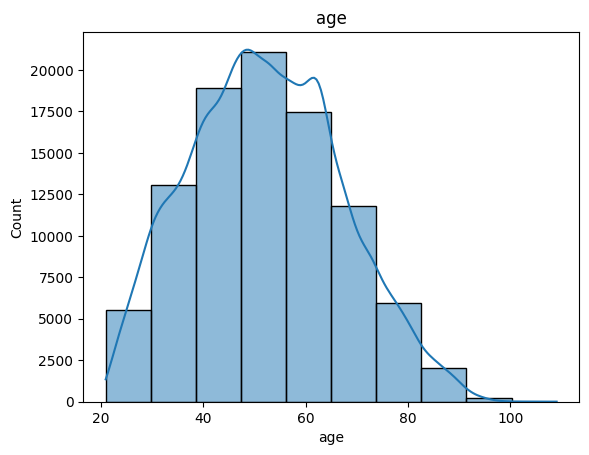

In [17]:
col = 'age'

sns.histplot(data[col], kde=True, bins=10)
plt.title(col)

_There is no problem with age column_

---

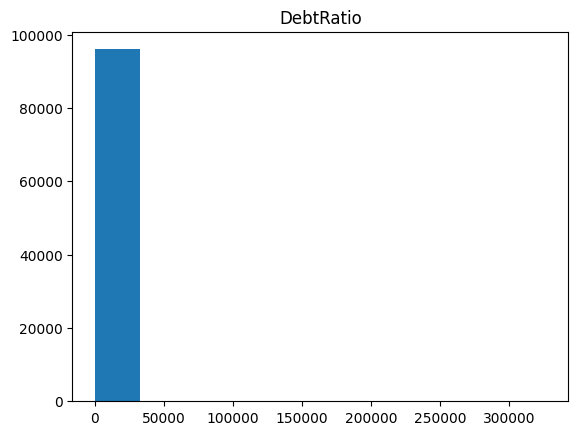

In [18]:
col = 'DebtRatio'

plt.hist(data[col])
plt.title(col)
plt.show()

_Debt ratio = monthly debt payments by montly gross income_

In [19]:
data[col].describe()

count     96000.000000
mean        349.352421
std        2012.791173
min           0.000000
25%           0.175350
50%           0.367435
75%           0.865646
max      326442.000000
Name: DebtRatio, dtype: float64

In [20]:
data[data[col]>10000.0]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
35370,0.035503,62,0,13526.0,NaN,26,0,9,0,0.0,0
104559,0.225789,69,6,32843.0,NaN,26,0,5,0,0.0,1
22295,0.158395,42,0,11988.0,NaN,7,0,3,0,4.0,0
66786,1.000000,63,0,61907.0,NaN,13,0,6,0,0.0,0
91,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
86645,0.251780,47,0,33409.0,NaN,6,0,2,0,0.0,0
39631,0.000765,73,0,15893.0,NaN,12,0,7,0,0.0,0
70864,0.001351,27,0,17859.0,NaN,17,0,11,0,0.0,0
76441,0.896458,56,3,10218.0,NaN,22,0,5,0,0.0,0


_There is no problem with <span style="background-color: #767676;">DebtRatio</span> column_

---

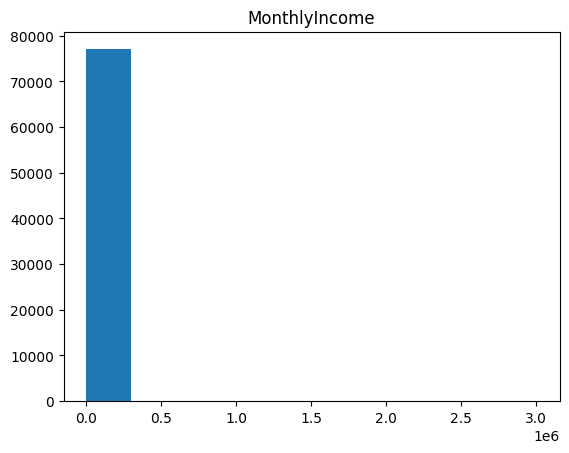

In [21]:
col = 'MonthlyIncome'

plt.hist(data[col])
plt.title(col)
plt.show()

In [22]:
data[col].describe()

count    7.705400e+04
mean     6.662228e+03
std      1.519004e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.221750e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [26]:
data[data[col]>100_000]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
36126,1.007832,47,1,0.030424,141500.0,4,3,1,1,2.0,0
77169,0.195705,72,0,0.000665,184903.0,3,0,0,0,0.0,0
117818,0.006899,48,0,0.017707,150000.0,8,0,0,0,4.0,0
119914,0.178401,51,0,0.006752,121150.0,4,0,0,0,2.0,0
105763,0.020142,61,0,0.000096,166700.0,6,0,0,0,1.0,0
48604,0.277881,57,1,0.185360,151855.0,31,0,13,0,0.0,0
17440,0.257346,72,0,0.024297,128000.0,18,0,2,0,1.0,0
73764,0.007328,52,0,0.001470,3008750.0,10,0,1,0,3.0,0
17374,1.000000,34,1,0.004304,251608.0,6,0,1,0,0.0,0
109873,0.948003,65,0,0.036187,101056.0,11,0,0,0,0.0,0


_The difference in data is skewness, so it will be imputed using the median_

---

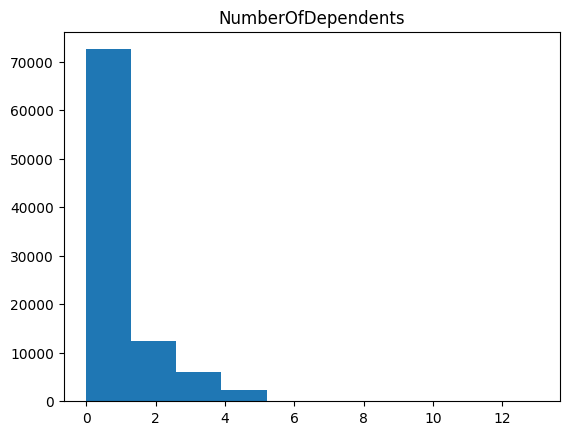

In [28]:
col = 'NumberOfDependents'

plt.hist(data[col])
plt.title(col)
plt.show()

_For missing values data, we assumed that they don't have dependent_

---

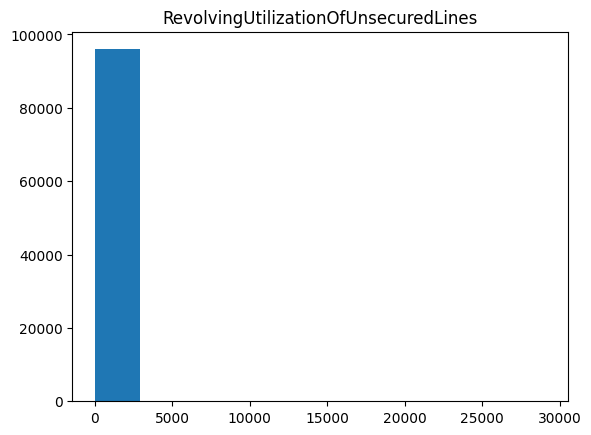

In [29]:
col = 'RevolvingUtilizationOfUnsecuredLines'

plt.hist(data[col])
plt.title(col)
plt.show()

(array([45853., 11581.,  7806.,  6022.,  4805.,  4162.,  4572., 10149.,
          415.,   152.]),
 array([0.        , 0.13492557, 0.26985114, 0.40477672, 0.53970229,
        0.67462786, 0.80955343, 0.944479  , 1.07940458, 1.21433015,
        1.34925572]),
 <BarContainer object of 10 artists>)

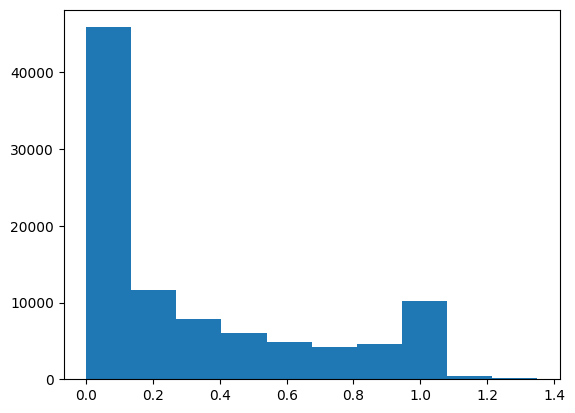

In [30]:
q1, q3 = np.quantile(data[col], q=(0.25, 0.75))
iqr = q3 - q1
ub = q3 + 1.5*iqr
lb = q1 - 1.5*iqr

plt.hist(data[(data[col]>=lb) & (data[col]<= ub)][col])

In [31]:
ub, lb

(1.34977631875, -0.7618548252499999)

_We have to remove outlier data_